Antes de arrancar... guardemos los datos!

https://github.com/ricardoahumada/Python_for_Data_Science/raw/master/data/2008.zip

¡El dataset es muy grande! Pero por suerte podemos cargarlo directamente desde el .zip

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_comp = pd.read_csv("../data/2008.zip",nrows=10000)
df_comp.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [3]:
df_comp.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
df = df_comp[["ArrDelay","Distance","DepDelay","AirTime"]].dropna()
df.head()

,ArrDelay,Distance,DepDelay,AirTime
0,-14.0,810,8.0,116.0
1,2.0,810,19.0,113.0
2,14.0,515,8.0,76.0
3,-6.0,515,-4.0,78.0
4,34.0,515,34.0,77.0


# Introducción al Scikitlearn
https://scikit-learn.org/stable/

In [ ]:
# ! pip install --upgrade scikit-learn --user

In [5]:
import sklearn
sklearn.__version__

'1.1.2'

# Datos numéricos y categóricos
### Identificar datos numéricos
Los datos numéricos se representan con números. Están vinculados a datos medibles (cuantitativos), como la edad o el número de horas que una persona trabaja a la semana.

Los modelos predictivos están diseñados de forma nativa para trabajar con datos numéricos. Además, los datos numéricos generalmente requieren muy poco trabajo antes de comenzar con el entrenamiento.

In [6]:
df_comp.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [7]:
df_comp.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
# Podemos seleccionar las columnas que contienen números enteros y comprobar su contenido.

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(df_comp)

print(numerical_columns)

df_comp[numerical_columns].head()

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,1746,88.0,...,515,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0


### Identificar variables categóricas
Las variables categóricas tienen **valores discretos**, normalmente representados por etiquetas de cadena (pero no solo) tomadas de una lista finita de opciones posibles. 

# ML con Python: preparación de datos

Los algoritmos de ML dependen completamente de los datos porque es el aspecto más crucial que hace posible el entrenamiento del modelo. 

Por otro lado, si no podemos dar sentido a esos datos, antes de entregarlos a los algoritmos de ML, será inútil. En palabras simples, siempre necesitamos alimentar los datos correctos, es decir, los **datos en la escala y formato correctos y que contengan características significativas**, para el problema que queremos que la máquina resuelva.

Esto hace que la preparación de datos sea **el paso más importante** en el proceso de ML. 

La preparación de datos puede definirse como el procedimiento que hace que nuestro conjunto de datos sea más apropiado para el proceso de ML.

In [9]:
# Seleccionamos las columnas valores categoricos

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns  = categorical_columns_selector(df_comp)

print(categorical_columns)

df_comp[categorical_columns].head()

['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']


,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,WN,N712SW,IAD,TPA,NaN
1,WN,N772SW,IAD,TPA,NaN
2,WN,N428WN,IND,BWI,NaN
3,WN,N612SW,IND,BWI,NaN
4,WN,N464WN,IND,BWI,NaN


# Técnicas de preprocesamiento de datos

### Escalado
Lo más probable es que nuestro conjunto de datos se componga de los atributos con una escala variable.\
No podemos proporcionar dichos datos al algoritmo ML, por lo que requiere un cambio de escala. 

El escalado de datos asegura que los atributos estén en la **misma escala**. Por lo general, los atributos se vuelven a escalar en el rango **de 0 y 1**. 

Los algoritmos de ML, como el Gradient descent y los k-Nearest Neighbors, requieren datos escalados. 

Podemos cambiar la escala de los datos con la ayuda de la clase MinMaxScaler de la biblioteca Python de scikit-learn.

In [10]:
from sklearn import preprocessing

array = df.values
array

array([[-14., 810.,   8., 116.],
       [  2., 810.,  19., 113.],
       [ 14., 515.,   8.,  76.],
       ...,
       [ 89., 337., 101.,  61.],
       [ 76., 337.,  79.,  68.],
       [  1., 337.,   0.,  65.]])

In [11]:
# MinMaxScaler para rescalar los datos en el rando de 0 - 1.

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [12]:
# MinMaxScaler para rescalar los datos en el rando de 0 - 1.

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(array)
data_rescaled

array([[0.04460967, 0.30358744, 0.03474903, 0.26726727],
       [0.07434944, 0.30358744, 0.05598456, 0.25825826],
       [0.09665428, 0.17130045, 0.03474903, 0.14714715],
       ...,
       [0.23605948, 0.09147982, 0.21428571, 0.1021021 ],
       [0.21189591, 0.09147982, 0.17181467, 0.12312312],
       [0.07249071, 0.09147982, 0.01930502, 0.11411411]])

In [13]:
data_scaler

MinMaxScaler()

In [14]:
min_max_scaler = preprocessing.MinMaxScaler([0,10])

X_train_minmax = min_max_scaler.fit_transform(df)
X_train_minmax

array([[0.44609665, 3.03587444, 0.34749035, 2.67267267],
       [0.74349442, 3.03587444, 0.55984556, 2.58258258],
       [0.96654275, 1.71300448, 0.34749035, 1.47147147],
       ...,
       [2.3605948 , 0.91479821, 2.14285714, 1.02102102],
       [2.11895911, 0.91479821, 1.71814672, 1.23123123],
       [0.72490706, 0.91479821, 0.19305019, 1.14114114]])

In [15]:
df.max()

ArrDelay     500.0
Distance    2363.0
DepDelay     508.0
AirTime      360.0
dtype: float64

In [16]:
min_max_scaler

MinMaxScaler(feature_range=[0, 10])

In [17]:
min_max_scaler.fit_transform(np.array([3,3,3,4]).reshape(-1, 1))

array([[ 0.],
       [ 0.],
       [ 0.],
       [10.]])

>¿Qué conseguimos reescalando los datos?

In [18]:
df.iloc[2]

ArrDelay     14.0
Distance    515.0
DepDelay      8.0
AirTime      76.0
Name: 2, dtype: float64

> Otra manera: usando scale

In [20]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(df)
X_scaled

array([[-0.88655228,  0.38853788, -0.39712053,  0.43149522],
       [-0.42536799,  0.38853788, -0.06254089,  0.3773486 ],
       [-0.07947978, -0.26566924, -0.39712053, -0.29045976],
       ...,
       [ 2.08232154, -0.66041117,  2.43159827, -0.56119288],
       [ 1.70760931, -0.66041117,  1.76243899, -0.43485076],
       [-0.45419201, -0.66041117, -0.64045118, -0.48899738]])

In [22]:
df_scaled = pd.DataFrame(X_scaled,columns =df.columns)
df_scaled

,ArrDelay,Distance,DepDelay,AirTime
0,-0.886552,0.388538,-0.397121,0.431495
1,-0.425368,0.388538,-0.062541,0.377349
2,-0.079480,-0.265669,-0.397121,-0.290460
3,-0.655960,-0.265669,-0.762117,-0.254362
4,0.497001,-0.265669,0.393704,-0.272411
...,...,...,...,...
9806,-0.310072,-0.660411,-0.488370,-0.525095
9807,-0.425368,-0.660411,-0.518786,-0.470949
9808,2.082322,-0.660411,2.431598,-0.561193
9809,1.707609,-0.660411,1.762439,-0.434851


<AxesSubplot: ylabel='Frequency'>

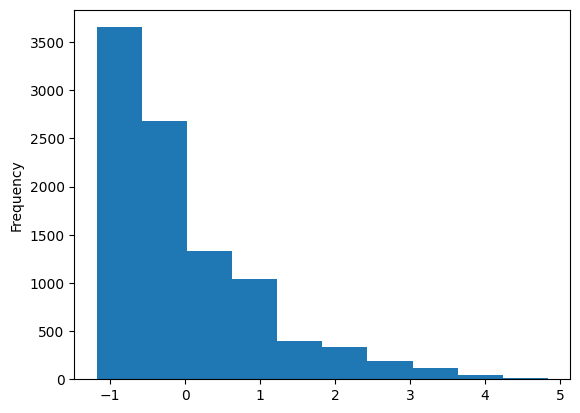

In [23]:
df_scaled.AirTime.plot.hist()

<AxesSubplot: ylabel='Frequency'>

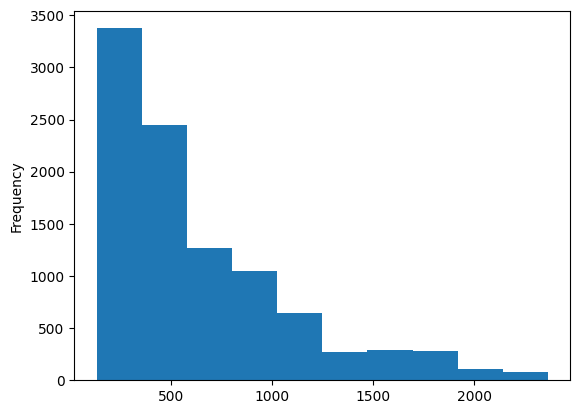

In [24]:
df.Distance.plot.hist()

In [25]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_scaled.describe()

,ArrDelay,Distance,DepDelay,AirTime
count,9811.0000,9811.0000,9811.0000,9811.0000
mean,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.5783,-1.1128,-0.9446,-1.1749
25%,-0.5983,-0.6959,-0.6100,-0.7056
50%,-0.3101,-0.4165,-0.3667,-0.3807
75%,0.2952,0.4728,0.2416,0.4676
max,13.9290,3.8326,14.8110,4.8354


In [26]:
# media de las filas
X_scaled.mean(axis=0)

array([ 4.34538418e-17,  5.79384557e-18,  4.34538418e-17, -9.84953746e-17])

In [27]:
# STD de las filas

X_scaled.std(axis=0)

array([1., 1., 1., 1.])

### Normalización
Otra técnica útil de preprocesamiento de datos es la Normalización. Esto se usa para **cambiar la escala de cada fila de datos para que tenga una longitud de 1**. 

Es principalmente útil en conjuntos de datos dispersos donde tenemos muchos ceros. Podemos cambiar la escala de los datos con la ayuda de la clase **Normalizer** de scikit-learn.

#### Tipos de normalización
##### Normalización L1
Puede definirse como la técnica de normalización que modifica los valores del conjunto de datos de manera que **en cada fila la suma de los valores absolutos siempre sea igual a 1**. También se le llama Desviaciones Mínimas Absolutas.

In [ ]:
pd.__version__

In [37]:
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l1').fit(array)
Data_normalized = Data_normalizer.transform(array)

Data_normalized

array([[-0.01476793,  0.85443038,  0.00843882,  0.12236287],
       [ 0.00211864,  0.85805085,  0.02012712,  0.11970339],
       [ 0.0228385 ,  0.84013051,  0.01305057,  0.12398042],
       ...,
       [ 0.15136054,  0.57312925,  0.17176871,  0.1037415 ],
       [ 0.13571429,  0.60178571,  0.14107143,  0.12142857],
       [ 0.00248139,  0.83622829,  0.        ,  0.16129032]])

In [38]:
# También podemos resumir los datos para la salida según nuestra elección. 

from numpy import set_printoptions

set_printoptions(precision=2)
print ("\nNormalized data:\n", Data_normalized [0:3])


Normalized data:
 [[-0.01  0.85  0.01  0.12]
 [ 0.    0.86  0.02  0.12]
 [ 0.02  0.84  0.01  0.12]]


#### Normalización L2
Se puede definir como la técnica de normalización que modifica los valores del conjunto de datos de manera que **en cada fila la suma de los cuadrados siempre sea igual a 1**. También se le llama mínimos cuadrados.

In [39]:
from sklearn.preprocessing import Normalizer

array = df.values

Data_normalizer = Normalizer(norm='l2').fit(array)
Data_normalized = Data_normalizer.transform(array)

In [40]:
set_printoptions(precision=2)
print ("\nNormalized data:\n", Data_normalized [0:3])


Normalized data:
 [[-0.02  0.99  0.01  0.14]
 [ 0.    0.99  0.02  0.14]
 [ 0.03  0.99  0.02  0.15]]


#### binarización
Esta es la técnica para hacer nuestros datos sean binarios. Para ello usaremos un umbral binario. 

Los valores por encima de ese valor de umbral se convertirán en 1 y por debajo de ese umbral se convertirán en 0. 
Por ejemplo, si elegimos valor de umbral = 0,5, entonces el valor del conjunto de datos por encima se convertirá en 1 y por debajo de este se convertirá en 0. 

**Esta técnica es útil cuando tenemos probabilidades en nuestro conjunto de datos y queremos convertirlas en valores nítidos.**

Podemos binarizar los datos con la ayuda de la clase **Binarizer**.

In [ ]:
from sklearn.preprocessing import Binarizer

array = df.values


binarizer = Binarizer(threshold=0.5).fit(array)
Data_binarized = binarizer.transform(array)

print ("\nBinary data:\n", Data_binarized [0:5])

#### Estandarización
Transforma los atributos de los datos con una distribución gaussiana. Diferencia la media y la desviación estándar (SD) a una **distribución gaussiana estándar con una media de 0 y una desviación estándar de 1**. 

Esta técnica es útil en algoritmos de ML como la regresión lineal, la regresión logística que asume una distribución gaussiana en el conjunto de datos de entrada y produce mejores resultados con datos reescalados. 

Podemos estandarizar los datos (media = 0 y SD = 1) con la ayuda de la clase StandardScaler de la biblioteca Python de scikit-learn.

In [41]:
from sklearn.preprocessing import StandardScaler

array = df.values

data_scaler = StandardScaler().fit(array)
data_rescaled = data_scaler.transform(array)

set_printoptions(precision=2)
print ("\nRescaled data:\n", data_rescaled [0:5])


Rescaled data:
 [[-0.89  0.39 -0.4   0.43]
 [-0.43  0.39 -0.06  0.38]
 [-0.08 -0.27 -0.4  -0.29]
 [-0.66 -0.27 -0.76 -0.25]
 [ 0.5  -0.27  0.39 -0.27]]


### Etiquetado de datos
Es muy importante enviar los datos a los algoritmos de ML con el etiquetado adecuado. Por ejemplo, en caso de problemas de clasificación, hay muchas etiquetas en forma de palabras, números, etc..

#### ¿Qué es la codificación de etiquetas?
La mayoría de las funciones de sklearn esperan que los datos tengan **etiquetas de números** en lugar de etiquetas de palabras. Por lo tanto, necesitamos convertir dichas etiquetas en etiquetas numéricas. Este proceso se denomina codificación de etiquetas. Podemos realizar la codificación de etiquetas de datos con la ayuda de la función **LabelEncoder()**.

In [42]:
from sklearn import preprocessing

columns = df.columns.array
print(columns)

# Crea el codificador de etiquetas y lo entrena
encoder = preprocessing.LabelEncoder()
encoder.fit(columns)



<PandasArray>
['ArrDelay', 'Distance', 'DepDelay', 'AirTime']
Length: 4, dtype: object


LabelEncoder()

In [43]:
# comprueba el rendimiento codificando la lista ordenada aleatoriamente:
test_labels = ['Distance', 'DepDelay', 'AirTime']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))


Labels = ['Distance', 'DepDelay', 'AirTime']
Encoded values = [3, 2, 0]


In [44]:
encoded_values = [3,0,2,1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nDecoded labels =", list(decoded_list))


Decoded labels = ['Distance', 'AirTime', 'DepDelay', 'ArrDelay']


# Datos numéricos y categóricos
### Identificar datos numéricos
Los datos numéricos se representan con números. Están vinculados a datos medibles (cuantitativos), como la edad o el número de horas que una persona trabaja a la semana.

Los modelos predictivos están diseñados de forma nativa para trabajar con datos numéricos. Además, los datos numéricos generalmente requieren muy poco trabajo antes de comenzar con el entrenamiento.

In [ ]:
df_comp.dtypes

In [ ]:
df_comp.dtypes.unique()

In [ ]:
# Podemos seleccionar las columnas que contienen números enteros y comprobar su contenido.

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(df_comp)
print(numerical_columns)

df_comp[numerical_columns].head()

> Cuál sería el pre-procesado para los datos numéricos?

### Identificar variables categóricas
Las variables categóricas tienen **valores discretos**, normalmente representados por etiquetas de cadena (pero no solo) tomadas de una lista finita de opciones posibles. 

In [52]:
# Seleccionamos las columnas valores categoricos

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns  = categorical_columns_selector(df_comp)

print(categorical_columns)

data_categorical=df_comp[categorical_columns]

data_categorical.head()

['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']


,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,WN,N712SW,IAD,TPA,NaN
1,WN,N772SW,IAD,TPA,NaN
2,WN,N428WN,IND,BWI,NaN
3,WN,N612SW,IND,BWI,NaN
4,WN,N464WN,IND,BWI,NaN


## Estrategias para codificar categorías

#### Codificación de categorías ordinales
La estrategia más intuitiva es codificar cada categoría con un número diferente. 
El **OrdinalEncoder** transformará los datos de esa manera.

In [53]:
df_comp['Origin'].unique()

array(['IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB', 'LIT',
       'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA',
       'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD', 'RDU',
       'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE',
       'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU',
       'HRL'], dtype=object)

In [56]:
from sklearn.preprocessing import OrdinalEncoder

or_column = data_categorical[["Origin"]]

encoder = OrdinalEncoder()
or_encoded = encoder.fit_transform(or_column)
or_encoded

array([[22.],
       [22.],
       [23.],
       ...,
       [28.],
       [28.],
       [28.]])

In [57]:
encoder.categories_

[array(['ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF',
        'BUR', 'BWI', 'CLE', 'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP',
        'FLL', 'GEG', 'HOU', 'HRL', 'IAD', 'IND', 'ISP', 'JAN', 'JAX',
        'LAS', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MCO', 'MDW', 'MHT',
        'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'ORF', 'PBI', 'PDX', 'PHL',
        'PHX', 'PIT', 'PVD', 'RDU', 'RNO', 'RSW', 'SAN', 'SAT', 'SDF',
        'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TPA', 'TUL',
        'TUS'], dtype=object)]

### Codificación de categorías nominales (sin asumir ningún orden)
**OneHotEncoder** es un codificador alternativo que evita que los modelos posteriores hagan suposiciones falsas sobre el orden de las categorías. 

Para una característica determinada, creará tantas columnas nuevas como categorías posibles. Para una muestra dada, el valor de la columna correspondiente a la categoría se establecerá en 1 mientras que todas las columnas de las demás categorías se establecerán en 0.

In [58]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
or_encoded = encoder.fit_transform(or_column)
or_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0

### Dummies
La función **get_dummies** permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad (que una de las características sea una combinación lineal de las otras), lo que dificulta el correcto funcionamiento de los algoritmos. Para ello disponemos del argumento drop_first.

Una vez creadas las "variables dummies", solo tendríamos que sustituir la característica original en el dataset por las creadas.

In [59]:
or_column

,Origin
0,IAD
1,IAD
2,IND
3,IND
4,IND
...,...
9995,LAX
9996,LAX
9997,LAX
9998,LAX


In [60]:
or_dummies = pd.get_dummies(or_column)
or_dummies

,Origin_ABQ,Origin_ALB,Origin_AMA,Origin_AUS,Origin_BDL,Origin_BHM,Origin_BNA,Origin_BOI,Origin_BUF,Origin_BUR,...,Origin_SEA,Origin_SFO,Origin_SJC,Origin_SLC,Origin_SMF,Origin_SNA,Origin_STL,Origin_TPA,Origin_TUL,Origin_TUS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
or_dummies.idxmax(axis=1)

0       Origin_IAD
1       Origin_IAD
2       Origin_IND
3       Origin_IND
4       Origin_IND
           ...    
9995    Origin_LAX
9996    Origin_LAX
9997    Origin_LAX
9998    Origin_LAX
9999    Origin_LAX
Length: 10000, dtype: object

### Discretizar... si lo necesitamos... (BINNING )

Algunos algoritmos de aprendizaje de máquinas pueden preferir o requerir variables de entrada categóricas u ordinales, como algunos algoritmos de árbol de decisión y basados en reglas.

**KBinsDiscretizer** agrupa datos continuos en intervalos.



In [62]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform') # Strategies "uniform"

In [63]:
categorizados = est.fit_transform(df[["ArrDelay"]].dropna())
categorizados

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [64]:
pd.DataFrame(categorizados,columns=["ArrDelay"]).ArrDelay.value_counts()

0.0000    9479
1.0000     315
2.0000      15
3.0000       2
Name: ArrDelay, dtype: int64

>Bins iguales...

In [65]:
df["Rango"] = list(range(df.shape[0]))
print(df)

      ArrDelay  Distance  DepDelay  AirTime  Rango
0     -14.0000       810    8.0000 116.0000      0
1       2.0000       810   19.0000 113.0000      1
2      14.0000       515    8.0000  76.0000      2
3      -6.0000       515   -4.0000  78.0000      3
4      34.0000       515   34.0000  77.0000      4
...        ...       ...       ...      ...    ...
9995    6.0000       337    5.0000  63.0000   9806
9996    2.0000       337    4.0000  66.0000   9807
9997   89.0000       337  101.0000  61.0000   9808
9998   76.0000       337   79.0000  68.0000   9809
9999    1.0000       337    0.0000  65.0000   9810

[9811 rows x 5 columns]


In [66]:
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # Strategies "quantile"
est

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [67]:
categorizados = est.fit_transform(df[["Rango"]].dropna())
print(categorizados)
pd.DataFrame(categorizados,columns=["Rango"]).value_counts()

[[0.]
 [0.]
 [0.]
 ...
 [3.]
 [3.]
 [3.]]


Rango 
0.0000    2453
2.0000    2453
3.0000    2453
1.0000    2452
dtype: int64

# Usar variables numéricas y categóricas juntas

In [68]:
df_comp

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0000,1955,2211.0000,2225,WN,335,...,4.0000,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0000,735,1002.0000,1000,WN,3231,...,5.0000,10.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0000,620,804.0000,750,WN,448,...,3.0000,17.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0000,930,1054.0000,1100,WN,1746,...,3.0000,7.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0000,1755,1959.0000,1925,WN,3920,...,3.0000,10.0000,0,NaN,0,2.0000,0.0000,0.0000,0.0000,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008,1,6,7,2000.0000,1955,2121.0000,2115,WN,593,...,5.0000,13.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9996,2008,1,6,7,1624.0000,1620,1742.0000,1740,WN,618,...,4.0000,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9997,2008,1,6,7,1946.0000,1805,2059.0000,1930,WN,646,...,4.0000,8.0000,0,NaN,0,0.0000,0.0000,6.0000,0.0000,83.0000
9998,2008,1,6,7,1549.0000,1430,1706.0000,1550,WN,656,...,3.0000,6.0000,0,NaN,0,0.0000,48.0000,0.0000,0.0000,28.0000


In [69]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_comp)
categorical_columns = categorical_columns_selector(df_comp)

### Enviar columnas a un procesador específico
- **La codificación one-hot:** se aplicará a las columnas categóricas. Además, usamos handle_unknown="ignore" para resolver los posibles problemas debido a categorías raras.

- **escalado numéricos:** las features numéricas serán estandarizadas.

In [70]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [71]:
# Creamos el transformador y asociamos cada uno de estos preprocesadores con sus respectivas columnas.

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

<div>
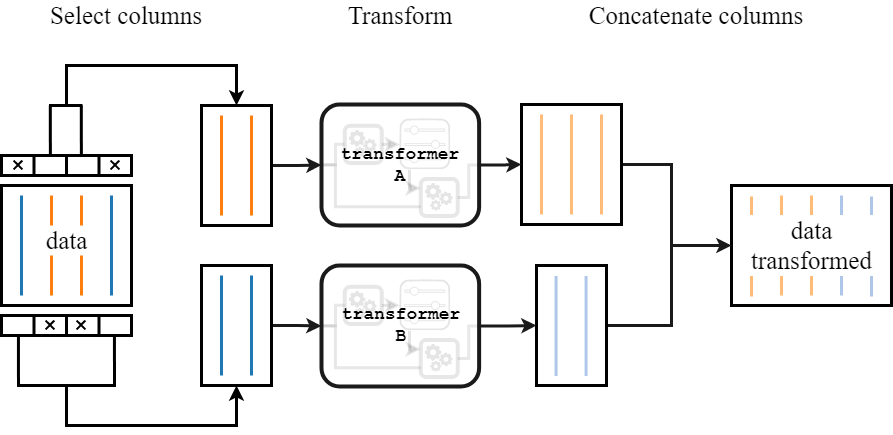
</div>

>El ColumnTransformer es como cualquier otro transformador de scikit-learn. \
En particular, se puede combinar con un clasificador en un Pipeline:

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['UniqueCarrier', 'TailNum',
                                                   'Origin', 'Dest',
                                                   'CancellationCode']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Year', 'Month',
                                                   'DayofMonth', 'DayOfWeek',
                                                   'DepTime', 'CRSDepTime',
                                                   'ArrTime', 'CRSArrTime',
                                                   'FlightNum',
                                                   'ActualElapsedTime',
                                                   'CRSElapsedTime', 'AirTime',
                                                   'ArrDelay', 'DepDelay',
                                                   'Distance', 'TaxiIn',
                                                   'TaxiOut', 'Cancelled',
                                                   'Diverted', 'CarrierDelay',
                                                   'WeatherDelay', 'NASDelay',
                                                   'SecurityDelay',
                                                   'LateAircraftDelay'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

# Ingeniería de variables (features)

La ingeniería de variables normalmente se define como "la transformación para añadir valor". 

Algunos ejemplos comunes de tareas de ingeniería de variabless son: **features para representar datos categóricos, features para representar texto y features para representar imágenes**. Además, es común crear **features derivadas** para aumentar la complejidad del modelo y la imputación de datos faltantes. A menudo, este proceso se conoce como **vectorización**, ya que implica convertir datos arbitrarios en vectores de buen comportamiento.

Aún no estamos trabajando con algoritmos concretos, así que vamos a verlo más adelante, pero algunos ejemplos podrían ser...

In [73]:
df["DesviacionHora"] = abs(df["ArrDelay"])

In [74]:
df["ArrDelay"].mean()

16.757415146264396

In [75]:
df["DesviacionHora"].mean()

22.827744368565895

In [76]:
df["logAirTime"] = np.log(df["AirTime"])

In [81]:
df=df_comp
df.shape

(10000, 29)

In [82]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [83]:
df["CRSDepTime"]

0       1955
1        735
2        620
3        930
4       1755
        ... 
9995    1955
9996    1620
9997    1805
9998    1430
9999    1050
Name: CRSDepTime, Length: 10000, dtype: int64

In [84]:
df["Weekends"] = False
df["Weekends"][df.DayOfWeek.isin([6,7])] = True

In [85]:
df["Weekends"]

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Weekends, Length: 10000, dtype: bool

In [86]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Weekends
0,2008,1,3,4,2003.0000,1955,2211.0000,2225,WN,335,...,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
1,2008,1,3,4,754.0000,735,1002.0000,1000,WN,3231,...,10.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
2,2008,1,3,4,628.0000,620,804.0000,750,WN,448,...,17.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
3,2008,1,3,4,926.0000,930,1054.0000,1100,WN,1746,...,7.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
4,2008,1,3,4,1829.0000,1755,1959.0000,1925,WN,3920,...,10.0000,0,NaN,0,2.0000,0.0000,0.0000,0.0000,32.0000,False


In [87]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Weekends'],
      dtype='object')

In [90]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Weekends
0,2008,1,3,4,2003.0000,1955,2211.0000,2225,WN,335,...,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
1,2008,1,3,4,754.0000,735,1002.0000,1000,WN,3231,...,10.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
2,2008,1,3,4,628.0000,620,804.0000,750,WN,448,...,17.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
3,2008,1,3,4,926.0000,930,1054.0000,1100,WN,1746,...,7.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False
4,2008,1,3,4,1829.0000,1755,1959.0000,1925,WN,3920,...,10.0000,0,NaN,0,2.0000,0.0000,0.0000,0.0000,32.0000,False


>¿Se nos ocurre alguna variable adicional?

In [ ]:
df.head()

## Variables derivadas
Otro tipo útil de feature es el que se deriva matemáticamente de algunas características de entrada.

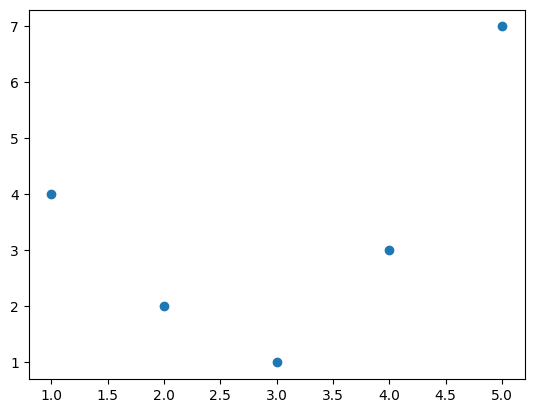

In [95]:
# Por ejemplo, estos datos claramente no se pueden describir bien con una línea recta:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

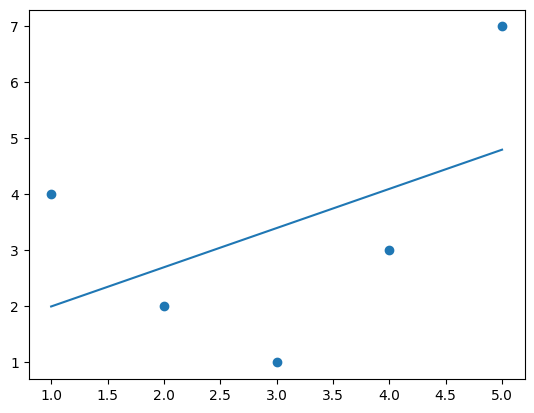

In [92]:
# Aún así, podemos ajustar una línea a los datos usando LinearRegression y obtener el resultado óptimo:

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [93]:
# Está claro que necesitamos un modelo más sofisticado para describir la relación entre x e y.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


>La matriz de features derivada tiene una columna que representa x, una segunda columna que representa x2 y una tercera columna que representa x3. \
Calcular una regresión lineal en esta entrada ampliada da un ajuste mucho más cercano a nuestros datos:

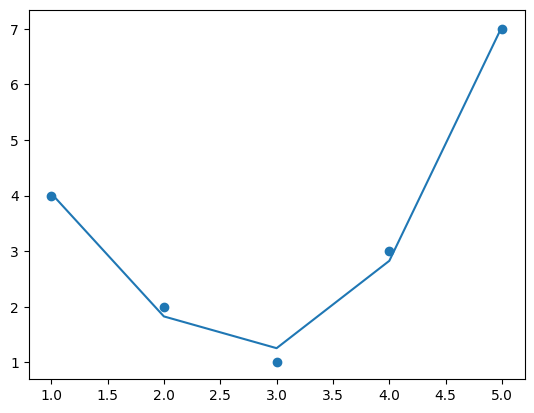

In [94]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputación de datos faltantes
Otra necesidad común en la ingeniería de features es la gestión de datos faltantes.
Al aplicar un modelo típico de ML a dichos datos, primero debemos reemplazar los datos que faltan con algún valor de relleno apropiado.

Para un enfoque de imputación de referencia, utilizando la media, la mediana o el valor más frecuente, Scikit-Learn proporciona la clase Imputer:

In [97]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [98]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])


## Ejercicios

1. Crea algunas variables que puedan resultar de interés para su posterior análisis, por ejemplo: 
    - franja del día (mañana, tarde o noche)
    - trimestres
    - la velocidad
    - ...


2. Transforma los datos de aerolinia (UniqueCarrier) a dummies. Usando ese nuevo objeto, da la proporción de vuelos de American Airlines

3. Sin consultarlo, pon un ejemplo que haga referencia a aprendizaje supervisado y un ejemplo de no supervisado

4. Crea una lista con las edades de tu familia. Ahora rescala estos datos para que sean un porcentaje en relación al más mayor.

5. Crea una lista (o usa una columna de un dataframe) y reescalala para que tenga media 0 y desviación estándard 1. 

    ¿Podrías recuperar los datos originales?

6. Explora el siguiente código, y comenta su uso y utilidad

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df = df[["ArrDelay","Distance","DepDelay","AirTime"]].dropna()

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(df)

In [ ]:
pd.DataFrame(X,columns = poly.get_feature_names(df.columns))

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X = poly.fit_transform(df)

In [ ]:
pd.DataFrame(X, columns = poly.get_feature_names(df.columns))

### Nuevo Dataset

Usando los datos de iris (o algunos sencillos de los que dispongas, salaries, datasets de ejemplo, datos propios...) aplica los siguientes procesos:

1. Reescala las columnas numéricas 

2. Convierte a dummies las columnas categóricas

3. Genera algunas variable adicionales. Piensa algunos ejemplos en los que pueda tener algún sentido (no siempre es fácil)

4. Genera interacciones entre variables (tanto numéricas -poly- como categóricas, si se puede), y haz alguna descripción de ellas!

5. Si discretizamos variables numéricas... tienen las nuevas categorías correspondencia con las especies?